In [37]:
import numpy as np

# define the system of equations: F(x, y) = [x^2 + xy - 4, y^2 - x +2]

def system(X):
    x, y = X
    return np.array([x**2 + x*y - 4, y**2 - x + 2])




# Numerical Jacobian using central differences
def numerical_jacobian(X, h=1e-6):
    n = len(X)
    J = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            X_plus = X.copy()
            X_minus = X.copy()
            X_plus[j] += h
            X_minus[j] -= h
            J[i, j] = (system(X_plus)[i] - system(X_minus)[i]) / (2 * h)
    return J

# Compute Jacobian at point (1, 1)
X = np.array([3.0, 2.0])
jacobian = numerical_jacobian(X)

# Output the Jacobian matrix
print("Jacobian matrix at (1, 1):")
print(jacobian)


# so the matrix works like

# df1/dx = f(x+hej) - f(x-ej)/2h

# here e is the vector and j is the jth position

Jacobian matrix at (1, 1):
[[ 8.  3.]
 [-1.  4.]]


In [32]:
def analytical_jacobian(X):
    x, y = X
    return np.array([[2*x + y, x], [-1, 2*y]])
analytical_jacobian(X)

array([[ 8.,  3.],
       [-1.,  4.]])

In [39]:
x=[1.0, 1.0]

X = np.array(x, dtype="float")
print(X)

[1. 1.]


[10.  1.]
[ 5.17948718 -0.58974359]
[ 2.91478711 -0.36711751]
[ 2.19221985 -1.28372442]
[ 2.01430736 -1.02578131]
[ 2.00011707 -1.00026692]
Converged in 6 iterations with error 7.25e-08
Solution: x = 2.000000, y = -1.000000
Verification: F(solution) = [1.37024614e-08 7.12312609e-08]


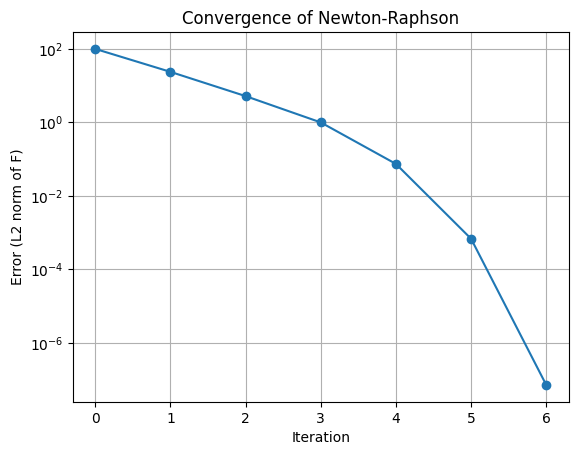

In [44]:
# ```python
import numpy as np
import matplotlib.pyplot as plt

# Define the system: F(x, y) = [x^2 + y - 3, x + y^2 - 3]
def system(X):
    x, y = X
    return np.array([x**2 + y - 3, x + y**2 - 3])

# Numerical Jacobian using central differences
def numerical_jacobian(X, h=1e-6):
    n = len(X)
    J = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            X_plus = X.copy()
            X_minus = X.copy()
            X_plus[j] += h
            X_minus[j] -= h
            J[i, j] = (system(X_plus)[i] - system(X_minus)[i]) / (2 * h)
    return J

# Newton-Raphson method
def newton_raphson(X0, max_iter=100, tol=1e-6, divergence_threshold=1e6):
    X = np.array(X0, dtype=float)
    errors = []
    
    for i in range(max_iter):
        # Evaluate system at current point
        F = system(X)
        error = np.linalg.norm(F)
        errors.append(error)
        
        # Check for convergence
        if error < tol:
            print(f"Converged in {i} iterations with error {error:.2e}")
            return X, errors, True
        
        # Check for divergence
        if error > divergence_threshold or np.any(np.isnan(X)) or np.any(np.isinf(X)):
            print(f"Diverged at iteration {i} with error {error:.2e}")
            return X, errors, False
        
        # Compute Jacobian and solve for update: J * delta = -F
        J = numerical_jacobian(X)
        try:
            delta = np.linalg.solve(J, -F)
        except np.linalg.LinAlgError:
            print(f"Singular Jacobian at iteration {i}")
            return X, errors, False
        
        # Update X
        print(X)
        X += delta
    
    print(f"Did not converge within {max_iter} iterations. Final error: {error:.2e}")
    return X, errors, False

# Run the solver
initial_guess = [10.0, 1.0]
solution, errors, converged = newton_raphson(initial_guess)

# Print results
if converged:
    print(f"Solution: x = {solution[0]:.6f}, y = {solution[1]:.6f}")
    print(f"Verification: F(solution) = {system(solution)}")

# Plot convergence
plt.semilogy(errors, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Error (L2 norm of F)')
plt.title('Convergence of Newton-Raphson')
plt.grid(True)
plt.show()
